In [1]:
x=1

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
from scipy.stats import ttest_ind

# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.dpi'] = 100
sc.set_figure_params(vector_friendly=True)

In [3]:
hlca = sc.read('../../../../snakemake/hlca/5fold/hlca_hyperparam/data/pp/hlca_hvg_pearson.h5ad')
hlca

AnnData object with n_obs × n_vars = 2149684 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_l

In [4]:
sc.pp.normalize_total(hlca, target_sum=1e4)

In [5]:
sc.pp.log1p(hlca)

In [6]:
adata = sc.read('../../../pipeline/data/multigrate_mil/hlca_healthy_ipf_embed_balanced_final/31ab9f26f8_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [7]:
adata.obs.loc[adata.obs['core_or_extension'] == 'core', 'celltype'] = adata[adata.obs['core_or_extension'] == 'core'].obs['ann_level_3'].astype(str)
adata.obs.loc[adata.obs['core_or_extension'] != 'core', 'celltype'] = adata[adata.obs['core_or_extension'] != 'core'].obs['transf_ann_level_3_label'].astype(str)
adata.obs['celltype'] = adata.obs['celltype'].astype('category')

In [8]:
basal = hlca[adata[adata.obs['celltype'] == 'Basal'].obs_names].copy()
basal.obs['cell_attn'] = adata[adata.obs['celltype'] == 'Basal'].obs['cell_attn']
basal.obsm['X_umap'] = adata[adata.obs['celltype'] == 'Basal'].obsm['X_umap']
basal

AnnData object with n_obs × n_vars = 26767 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_lev

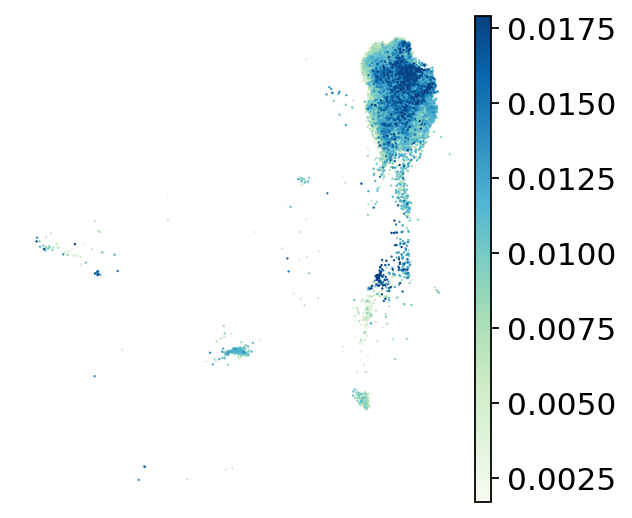

In [9]:
sc.pl.umap(
    basal,
    color=['cell_attn'],
    ncols=1,
    frameon=False,
    color_map="GnBu",
    title='',
    legend_loc=None,
    vmax='p99',
    save='_umap_cell_attn_basal.svg'
)

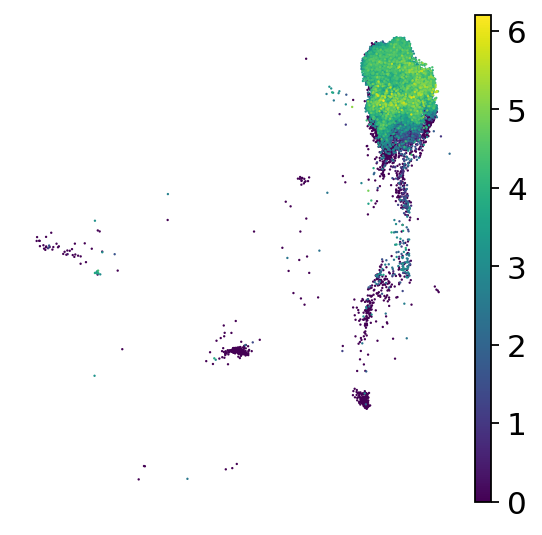

In [10]:
# KRT5 = ENSG00000186081
sc.pl.umap(
    basal,
    color=['ENSG00000186081'],
    ncols=1,
    frameon=False,
    color_map="viridis",
    title='',
    legend_loc=None,
    save='_umap_KRT5_basal.svg'
)

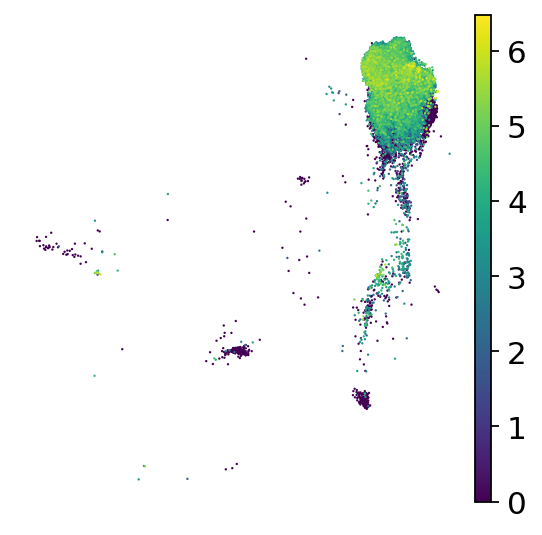

In [11]:
# KRT17 = ENSG00000128422
sc.pl.umap(
    basal,
    color=['ENSG00000128422'],
    ncols=1,
    frameon=False,
    color_map="viridis",
    title='',
    legend_loc=None,
    save='_umap_KRT17_basal.svg'
)

# analysis of top 10%

In [12]:
ipf_basal = basal[basal.obs['lung_condition_coarse'] == 'IPF'].copy()
ipf_basal

AnnData object with n_obs × n_vars = 3876 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [13]:
threshold_idx = int(len(ipf_basal) * 0.9)
threshold_value = sorted(ipf_basal.obs['cell_attn'])[threshold_idx]
threshold_value

0.015226076357066631

In [14]:
ipf_basal_top = ipf_basal[ipf_basal.obs['cell_attn'] >= threshold_value]
ipf_basal_top

View of AnnData object with n_obs × n_vars = 388 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_a

## KRT5

In [15]:
# KRT5 = ENSG00000186081
# KRT17 = ENSG00000128422
df1 = pd.DataFrame(ipf_basal_top[:, ['ENSG00000186081', 'ENSG00000128422']].X.A, columns=['KRT5', 'KRT17'])
df1.loc[:, 'group'] = 'top 10% cells'
df2 = pd.DataFrame(ipf_basal[:, ['ENSG00000186081', 'ENSG00000128422']].X.A, columns=['KRT5', 'KRT17'])
df2.loc[:, 'group'] = 'all cells'
df = pd.concat([df1, df2])
df

,KRT5,KRT17,group
0,0.000000,5.033736,top 10% cells
1,1.921789,3.822557,top 10% cells
2,3.994914,5.180218,top 10% cells
3,2.119108,5.237918,top 10% cells
4,0.000000,4.653564,top 10% cells
...,...,...,...
3871,0.000000,3.304703,all cells
3872,3.022877,3.022877,all cells
3873,2.547118,4.271395,all cells
3874,1.593003,3.950098,all cells


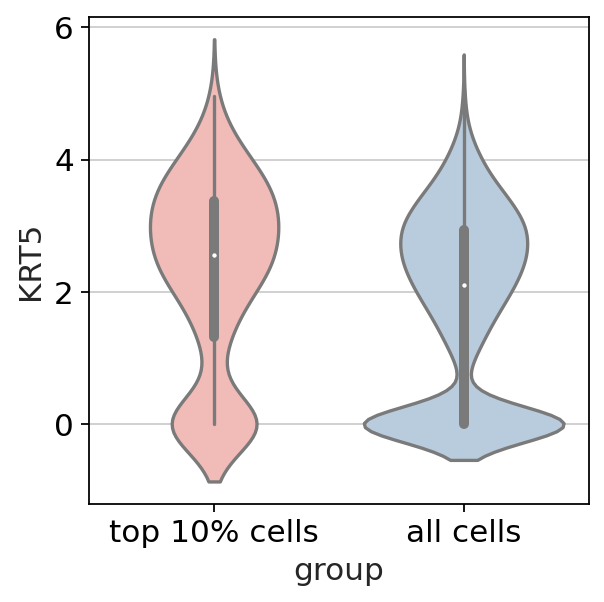

In [16]:
sns.violinplot(x="group", y="KRT5", data=df, palette="Pastel1")
plt.savefig('figures/violin_KRT5_top_vs_rest_ipf_basal.svg')

In [17]:
ttestresult = ttest_ind(df1['KRT5'], df2['KRT5'])

In [18]:
ttestresult.pvalue

5.331623843995325e-11

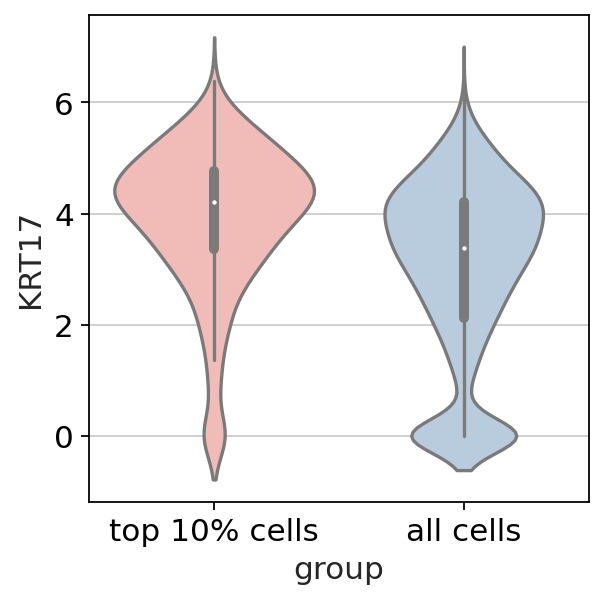

In [19]:
sns.violinplot(x="group", y="KRT17", data=df, palette="Pastel1")
plt.savefig('figures/violin_KRT17_top_vs_rest_ipf_basal.svg')

In [20]:
ttestresult = ttest_ind(df1['KRT17'], df2['KRT17'])

In [21]:
ttestresult.pvalue

6.102936303152313e-27